# RNN - LSTM
Recurrent Neural Networks (RNN) using Long Short-Term Memory (LSTM)

# Data

In [1]:
import os
import glob
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the directory path
directory_path = "../data"

# Get the list of all files in the directory
files = os.listdir(directory_path)

# Filter to grab only the files (not directories)
files = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

C:\Users\kevin\AppData\Local\Temp\ipykernel_19380\131651927.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = files[0:7]      # 2011 -> 2017
validation = files[7:8] # 2018
test = files[8:9]       # 2019

print("Training data:\t", train)
print("Validation data:", validation)
print("Testing data:\t", test)

Training data:	 ['All_Traffic 2011.csv', 'All_Traffic 2012.csv', 'All_Traffic 2013.csv', 'All_Traffic 2014.csv', 'All_Traffic 2015.csv', 'All_Traffic 2016.csv', 'All_Traffic 2017.csv']
Validation data: ['All_Traffic 2018.csv']
Testing data:	 ['All_Traffic 2019.csv']


In [3]:
x_train_All_Traffic = []
y_train_All_Traffic = []
x_test_All_Traffic = []
y_test_All_Traffic = []
x_validation_All_Traffic = []
y_validation_All_Traffic = []

# Process the training files
for file in train:
    # Read the CSV file
    one_year_data_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_All_Traffic = one_year_data_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_All_Traffic = one_year_data_All_Traffic['log_carloads']
    
    # Append data to training lists
    x_train_All_Traffic.append(x_All_Traffic)
    y_train_All_Traffic.append(y_All_Traffic)

# Process the testing file
for file in test:
    # Read the CSV file
    one_year_data_test_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
    
    # Drop rows with missing values
    one_year_data_test_All_Traffic.dropna(inplace=True)
    
    # Split into features and target
    x_test_All_Traffic1 = one_year_data_test_All_Traffic.drop(columns=['log_carloads'], inplace=False)
    y_test_All_Traffic1 = one_year_data_test_All_Traffic['log_carloads']
    
    # Append data to testing lists
    x_test_All_Traffic.append(x_test_All_Traffic1)
    y_test_All_Traffic.append(y_test_All_Traffic1)

# Process the validation file
for file in validation:
   # Read the CSV file
   one_year_data_validation_All_Traffic = pd.read_csv(os.path.join(directory_path, file))
   
   # Drop rows with missing values
   one_year_data_validation_All_Traffic.dropna(inplace=True)
   
   # Split into features and target
   x_validation_All_Traffic1 = one_year_data_validation_All_Traffic.drop(columns=['log_carloads','BEA_origin','BEA_dest'], inplace=False)
   y_validation_All_Traffic1 = one_year_data_validation_All_Traffic['log_carloads']
   
   # Append data to validation lists
   x_validation_All_Traffic.append(x_validation_All_Traffic1)
   y_validation_All_Traffic.append(y_validation_All_Traffic1)

# Concatenate all the data into DataFrames
x_train_All_Traffic = pd.concat(x_train_All_Traffic)
y_train_All_Traffic = pd.concat(y_train_All_Traffic)
x_test_All_Traffic = pd.concat(x_test_All_Traffic)
y_test_All_Traffic = pd.concat(y_test_All_Traffic)
x_validation_All_Traffic = pd.concat(x_validation_All_Traffic)
y_validation_All_Traffic = pd.concat(y_validation_All_Traffic)

print(x_train_All_Traffic[0:9])

# save column names of x_train_All_Traffic
column_names = x_train_All_Traffic.columns
column_names_begin = column_names[0:1]
column_names_end = column_names[3:]
column_names_orig = list(column_names_begin.append(column_names_end))

# One-hot encode the categorical features
# encoder = OneHotEncoder(sparse=False, drop=None)
encoder = OneHotEncoder(drop=None)
x_train_All_Traffic_encoded = encoder.fit_transform(x_train_All_Traffic.iloc[:,1:3])
x_test_All_Traffic_encoded = encoder.transform(x_test_All_Traffic.iloc[:,1:3])
# extra_columns=len(x_train_All_Traffic_encoded[0])
extra_columns = x_train_All_Traffic_encoded[0].shape[0]
column_names = column_names_orig + ['encoded' + str(i) for i in range(extra_columns)]

# get rid of columns that were encoded
x_train_All_Traffic = x_train_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)
x_test_All_Traffic = x_test_All_Traffic.drop(columns=['BEA_origin','BEA_dest'], inplace=False)

# Scaling the data
scaler = StandardScaler()
x_train_All_Traffic_scaled = scaler.fit_transform(x_train_All_Traffic)
x_test_All_Traffic_scaled = scaler.transform(x_test_All_Traffic)
x_validation_All_Traffic_scaled = scaler.transform(x_validation_All_Traffic)

# now add encoded data to the scaled data
x_train_All_Traffic = pd.concat([pd.DataFrame(x_train_All_Traffic_scaled), pd.DataFrame(x_train_All_Traffic_encoded)], axis=1)
x_test_All_Traffic = pd.concat([pd.DataFrame(x_test_All_Traffic_scaled), pd.DataFrame(x_test_All_Traffic_encoded)], axis=1)

# add column names to first 21 columns of x_train_All_Traffic and x_test_All_Traffic
x_train_All_Traffic.columns = column_names
x_test_All_Traffic.columns = column_names

   Average_Mileage  BEA_origin  BEA_dest  Population_origin  Population_dest  \
0         3.912023          10        10          18.974292        18.974292   
1         4.522430          10        11          18.974292         1.100462   
2         5.267321          10        13          18.974292         7.610982   
3         5.793802          10        20          18.974292         0.572526   
4         6.568714          10        28          18.974292         0.626198   
5         6.734454          10        29          18.974292         1.838462   
6         6.943499          10        31          18.974292         2.049325   
7         6.528557          10        40          18.974292         5.012703   
8         5.949249          10        48          18.974292         1.302836   

   Agriculture_forestry_fishing_and_hunting_origin  Construction_origin  \
0                                        13.689975            17.485232   
1                                        13.68997

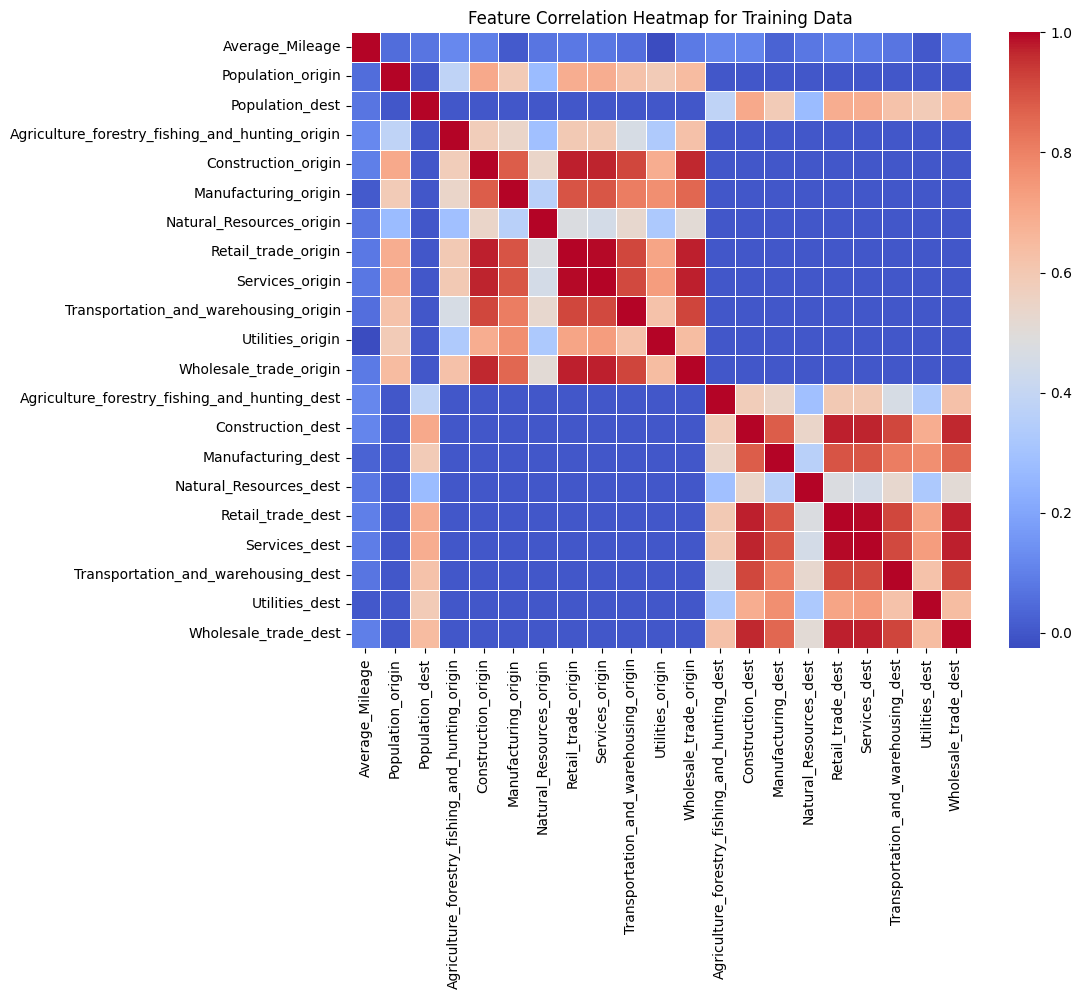

In [4]:
import seaborn as sns
#get correlations of each non-encoded features in dataset
#correlation_matrix = x_train_All_Traffic_scaled.corr()
x_train_All_Traffic_scaled_pd=pd.DataFrame(x_train_All_Traffic_scaled)
x_train_All_Traffic_scaled_pd.columns = column_names_orig
correlation_matrix = x_train_All_Traffic_scaled_pd.corr()
#correlation_matrix = x_train_All_Traffic.corr()

# Generate the heatmap without numbers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the heatmap
plt.title("Feature Correlation Heatmap for Training Data")
plt.show()

# Preprocessor

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical and categorical features
numerical_features = [
    'Agriculture_forestry_fishing_and_hunting_origin', 'Agriculture_forestry_fishing_and_hunting_dest',
    'Construction_origin', 'Construction_dest',
    'Manufacturing_origin', 'Manufacturing_dest',
    'Retail_trade_origin', 'Retail_trade_dest',
    'Services_origin', 'Services_dest',
    'Population_origin', 'Population_dest'
]
categorical_features = ['BEA_origin', 'BEA_dest']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessing pipeline
def preprocess_data(files, directory_path, preprocessor, target_column='log_carloads', fit=False):
    X, y = [], []
    for file in files:
        # Load and clean the data
        data = pd.read_csv(os.path.join(directory_path, file)).dropna()
        
        # Split features and target
        y.append(data[target_column])
        X.append(data.drop(columns=[target_column]))
    
    # Concatenate yearly data
    X = pd.concat(X)
    y = pd.concat(y)
    
    # Fit or transform using the preprocessor
    if fit:
        X_transformed = preprocessor.fit_transform(X)
    else:
        X_transformed = preprocessor.transform(X)
    
    return X_transformed, y

# Fit the preprocessor on the training data
x_train, y_train = preprocess_data(train, directory_path, preprocessor, fit=True)

# Use the fitted preprocessor to transform validation and test data
x_validation, y_validation = preprocess_data(validation, directory_path, preprocessor, fit=False)
x_test, y_test = preprocess_data(test, directory_path, preprocessor, fit=False)


# LSTM Model

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [7]:
# Hyperparameters
input_size = x_train.shape[1]  # Number of features
hidden_size = 256  # Number of LSTM units
num_layers = 4  # Number of LSTM layers
output_size = 1  # Single target variable
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [8]:
from scipy.sparse import issparse

def prepare_dataloader(X, y, batch_size):
    """
    Prepare a PyTorch DataLoader from features and target data.
    
    Args:
        X: Feature array (can be sparse).
        y: Target array.
        batch_size: Batch size for the DataLoader.

    Returns:
        DataLoader object.
    """
    # Convert sparse matrix to dense if needed
    if issparse(X):
        X = X.todense()  # Convert sparse matrix to dense
        X = np.array(X)  # Ensure it's a NumPy array

    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y.values if hasattr(y, 'values') else y, dtype=torch.float32)
    
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return dataloader

# Prepare DataLoaders
train_loader = prepare_dataloader(x_train, y_train, batch_size)
val_loader = prepare_dataloader(x_validation, y_validation, batch_size)
test_loader = prepare_dataloader(x_test, y_test, batch_size)

In [9]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden and cell states with zeros
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))

        # Pass the output of the last time step to the fully connected layer
        out = self.fc(out[:, -1, :])
        return out

In [10]:
# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Initialize lists to collect data
train_losses = []
val_losses = []
test_losses = []
test_r2_scores = []
test_r2_scores_adjusted = []

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch.unsqueeze(1))  # Add sequence dimension
        loss = criterion(outputs.squeeze(), y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Collect train loss

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_predictions = []
    val_targets = []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch.unsqueeze(1))
            loss = criterion(outputs.squeeze(), y_batch)

            val_loss += loss.item() * X_batch.size(0)
            
            # Collect predictions and targets for R^2 calculation
            val_predictions.extend(outputs.squeeze().cpu().numpy())
            val_targets.extend(y_batch.cpu().numpy())

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Collect validation loss
    
    val_r2 = r2_score(val_targets, val_predictions)

    # Test Loop (optional, if you want to monitor during training)
    test_loss = 0.0
    test_predictions = []
    test_targets = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            outputs = model(X_batch.unsqueeze(1))
            test_loss += criterion(outputs.squeeze(), y_batch).item() * X_batch.size(0)

            # Collect predictions and targets for R^2 calculation
            test_predictions.extend(outputs.squeeze().cpu().numpy())
            test_targets.extend(y_batch.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)  # Collect test loss

    # Calculate R^2 and Adjusted R^2
    test_r2 = r2_score(test_targets, test_predictions)
    test_r2_scores.append(test_r2)  # Collect test R^2 score

    n = len(test_targets)  # Number of samples
    k = x_test.shape[1]    # Number of predictors (features)
    test_r2_adjusted = 1 - ((1 - test_r2) * (n - 1)) / (n - k - 1)
    test_r2_scores_adjusted.append(test_r2_adjusted)

    # Print metrics for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Val R^2: {val_r2:.4f}, Test Loss: {test_loss:.4f}, Test R^2: {test_r2:.4f}, Adjusted Test R^2: {test_r2_adjusted:.4f}")

Epoch [1/100], Train Loss: 11.6880, Val Loss: 8.2753, Val R^2: 0.4663, Test Loss: 8.6976, Test R^2: 0.4120, Adjusted Test R^2: 0.3771
Epoch [2/100], Train Loss: 7.7995, Val Loss: 8.0269, Val R^2: 0.4823, Test Loss: 8.6380, Test R^2: 0.4160, Adjusted Test R^2: 0.3814
Epoch [3/100], Train Loss: 7.3470, Val Loss: 7.5577, Val R^2: 0.5126, Test Loss: 8.0532, Test R^2: 0.4556, Adjusted Test R^2: 0.4233
Epoch [4/100], Train Loss: 6.6922, Val Loss: 6.5910, Val R^2: 0.5749, Test Loss: 6.8410, Test R^2: 0.5375, Adjusted Test R^2: 0.5101
Epoch [5/100], Train Loss: 5.8074, Val Loss: 5.8051, Val R^2: 0.6256, Test Loss: 6.6082, Test R^2: 0.5532, Adjusted Test R^2: 0.5268
Epoch [6/100], Train Loss: 5.1742, Val Loss: 5.0793, Val R^2: 0.6724, Test Loss: 5.8811, Test R^2: 0.6024, Adjusted Test R^2: 0.5788
Epoch [7/100], Train Loss: 4.8254, Val Loss: 5.2647, Val R^2: 0.6605, Test Loss: 6.1897, Test R^2: 0.5815, Adjusted Test R^2: 0.5567
Epoch [8/100], Train Loss: 4.4184, Val Loss: 4.6719, Val R^2: 0.6987

In [12]:
# Evaluate on test data
model.eval()
test_loss = 0.0
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch.unsqueeze(1))
        test_loss += criterion(outputs.squeeze(), y_batch).item() * X_batch.size(0)
        y_pred.extend(outputs.squeeze().cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 3.9640


In [13]:
# Evaluate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = np.array(y_pred)
y_true = np.array(y_true)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

best_r2 = max(test_r2_scores)
best_r2_adjusted = max(test_r2_scores_adjusted)

print(f"Test MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}")
print(f'Best R^2={best_r2}, best adjusted R^2={best_r2_adjusted}')

Test MSE: 3.9640, MAE: 1.2232, R^2: 0.7320
Best R^2=0.7472697856910246, best adjusted R^2=0.7322908196474914


In [14]:
import matplotlib.pyplot as plt

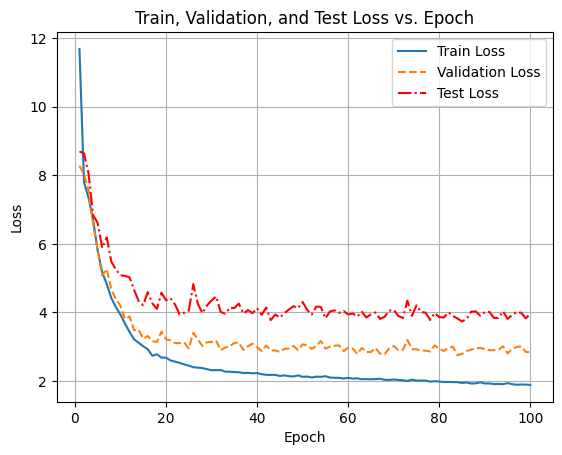

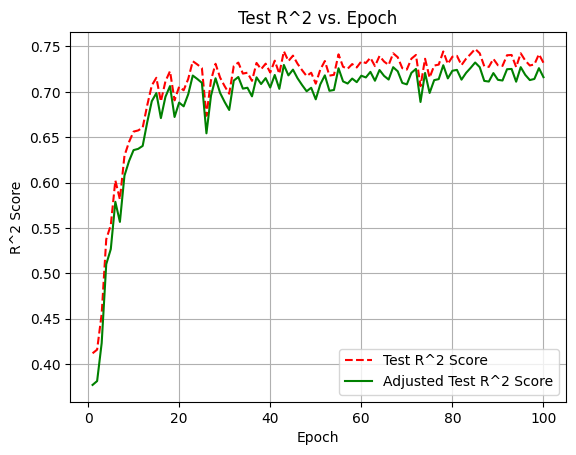

In [15]:
# Plot Train Loss vs Epoch
plt.figure()
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", linestyle="--")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", linestyle="-.", color="red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train, Validation, and Test Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

# Plot Test R^2 vs Epoch
plt.figure()
plt.plot(range(1, num_epochs + 1), test_r2_scores, label="Test R^2 Score", color='red', linestyle="--")
plt.plot(range(1, num_epochs + 1), test_r2_scores_adjusted, label="Adjusted Test R^2 Score", color='green')
plt.xlabel("Epoch")
plt.ylabel("R^2 Score")
plt.title("Test R^2 vs. Epoch")
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, 'Traffic Load')

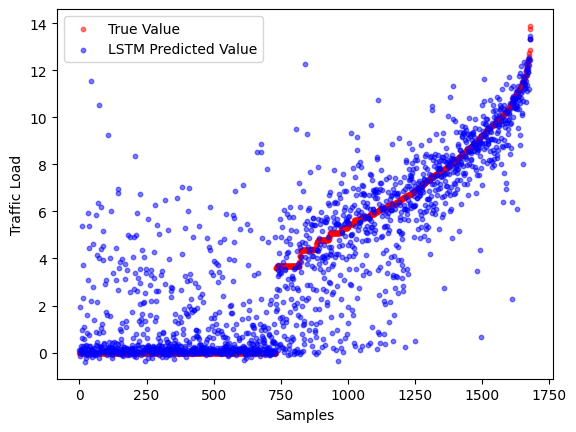

In [19]:
# Sort y_true and y_pred based on the sorted indices of y_true
sorted_indices = np.argsort(y_true)
y_true_sorted = np.array(y_true)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

#plot the difference between true values vs lstm predicted values
fig, ax = plt.subplots()
x_ax = range(len(y_test_All_Traffic))
ax.scatter(x_ax, y_true_sorted, c='r', label='True Value',alpha=0.5,s=10)
ax.scatter(x_ax, y_pred_sorted, c='b', label='LSTM Predicted Value',alpha=0.5,s=10)

ax.legend()
plt.xlabel('Samples')
plt.ylabel('Traffic Load')

Text(0, 0.5, 'Actual')

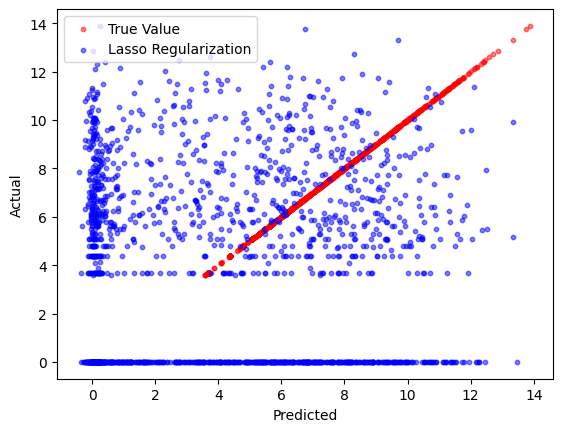

In [20]:
# plot the difference between y_test_All_Traffic and y_pred_lasso and y_pred_ridge
fig, ax = plt.subplots()
#x_ax = range(len(y_test_All_Traffic))
ax.scatter(y_test_All_Traffic, y_test_All_Traffic, c='r', label='True Value',alpha=0.5,s=10)
ax.scatter(y_pred, y_test_All_Traffic, c='b', label='Lasso Regularization',alpha=0.5,s=10)

ax.legend()
plt.xlabel('Predicted')
plt.ylabel('Actual')